<a href="https://colab.research.google.com/github/VeronikaBastiuchenko/All_hw_Python.ipynb/blob/main/HW_11_2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [12]:
monthly_avg = df['count'].resample('M').mean()

/tmp/ipython-input-2011312540.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['count'].resample('M').mean()


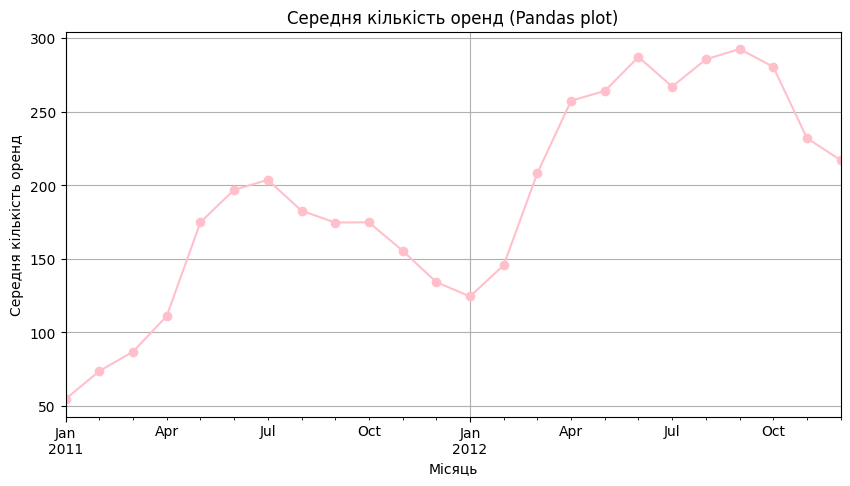

In [15]:
plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o', color='pink', title='Середня кількість оренд (Pandas plot)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

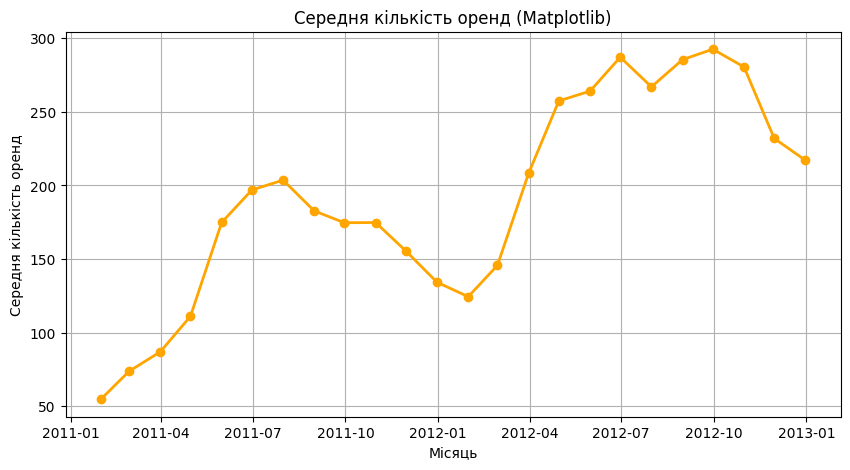

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='orange', linewidth=2)
plt.title('Середня кількість оренд (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

Обидва графіки показують однакову тенденцію, але варіант з Matplotlib виглядає більш професійно, бо можна краще контролювати кольори, товщину лінії та підписи. Pandas-підхід зручний для швидкого перегляду результатів під час аналізу даних.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [16]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

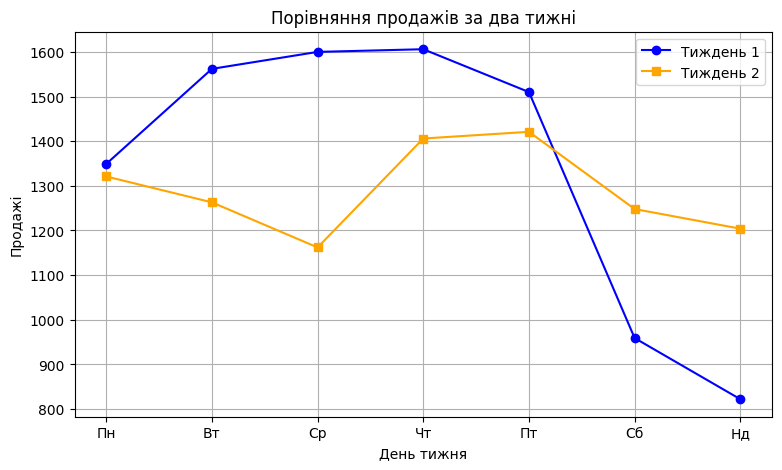

In [18]:
plt.figure(figsize=(9, 5))

plt.plot(days, sales_week1, marker='o', color='blue', label='Тиждень 1')
plt.plot(days, sales_week2, marker='s', color='orange', label='Тиждень 2')

plt.title('Порівняння продажів за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд'])
plt.legend()
plt.grid(True)
plt.show()

In [23]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f"Стандартне відхилення (Тиждень 1): {std_week1:.2f}")
print(f"Стандартне відхилення (Тиждень 2): {std_week2:.2f}")

if std_week1 < std_week2:
    print("Тиждень 1 був стабільнішим за продажами.")
elif std_week2 < std_week1:
    print("Тиждень 2 був стабільнішим за продажами.")
else:
    print("Обидва тижні мали однакову стабільність.")

Стандартне відхилення (Тиждень 1): 300.00
Стандартне відхилення (Тиждень 2): 90.91
Тиждень 2 був стабільнішим за продажами.


З графіка видно, що у першому тижні продажі сильно коливалися різко падали у вихідні.
У другому тижні лінія більш рівна.
Це підтверджується обчисленнями: стандартне відхилення у тижня 2 менше, отже продажі були стабільніші.

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

/tmp/ipython-input-2274927292.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_temp = df['temp'].resample('M').mean()


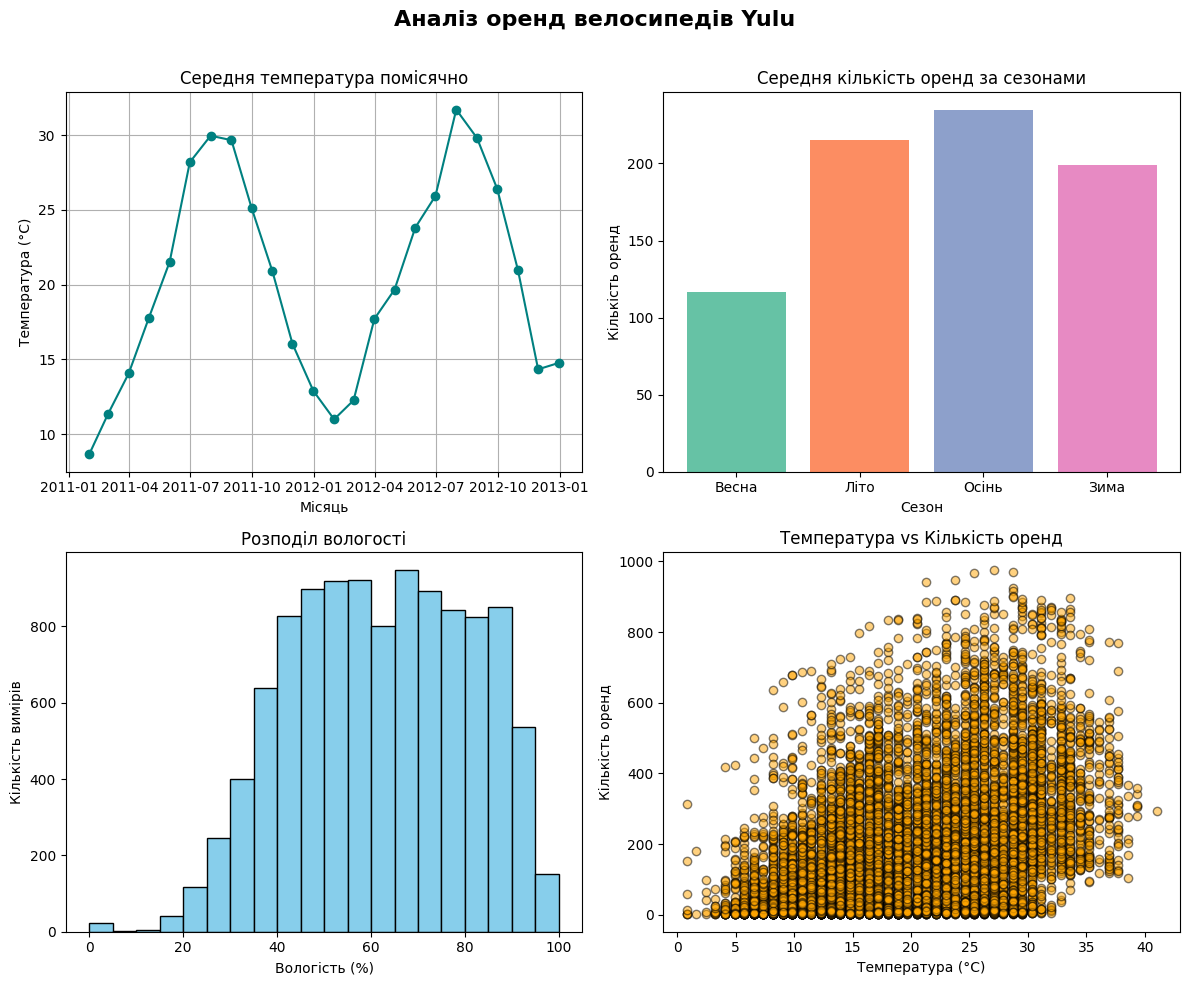

In [40]:
plt.figure(figsize=(12, 10))
plt.suptitle('Аналіз оренд велосипедів Yulu', fontsize=16, fontweight='bold')

# Лінійний графік середньої температури помісячно
plt.subplot(2, 2, 1)
monthly_temp = df['temp'].resample('M').mean()
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='teal')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура (°C)')
plt.grid(True)

# Стовпчикова діаграма середньої кількості оренд за сезонами
plt.subplot(2, 2, 2)
season_avg = df.groupby('season')['count'].mean()
seasons = ['Весна', 'Літо', 'Осінь', 'Зима']
plt.bar(seasons, season_avg, color=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')

# Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість вимірів')

# Scatter plot: температура vs кількість оренд
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.5, color='orange', edgecolor='k')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

/tmp/ipython-input-363504847.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax[0, 0].plot(df['temp'].resample('M').mean(), marker='o', color='blue')


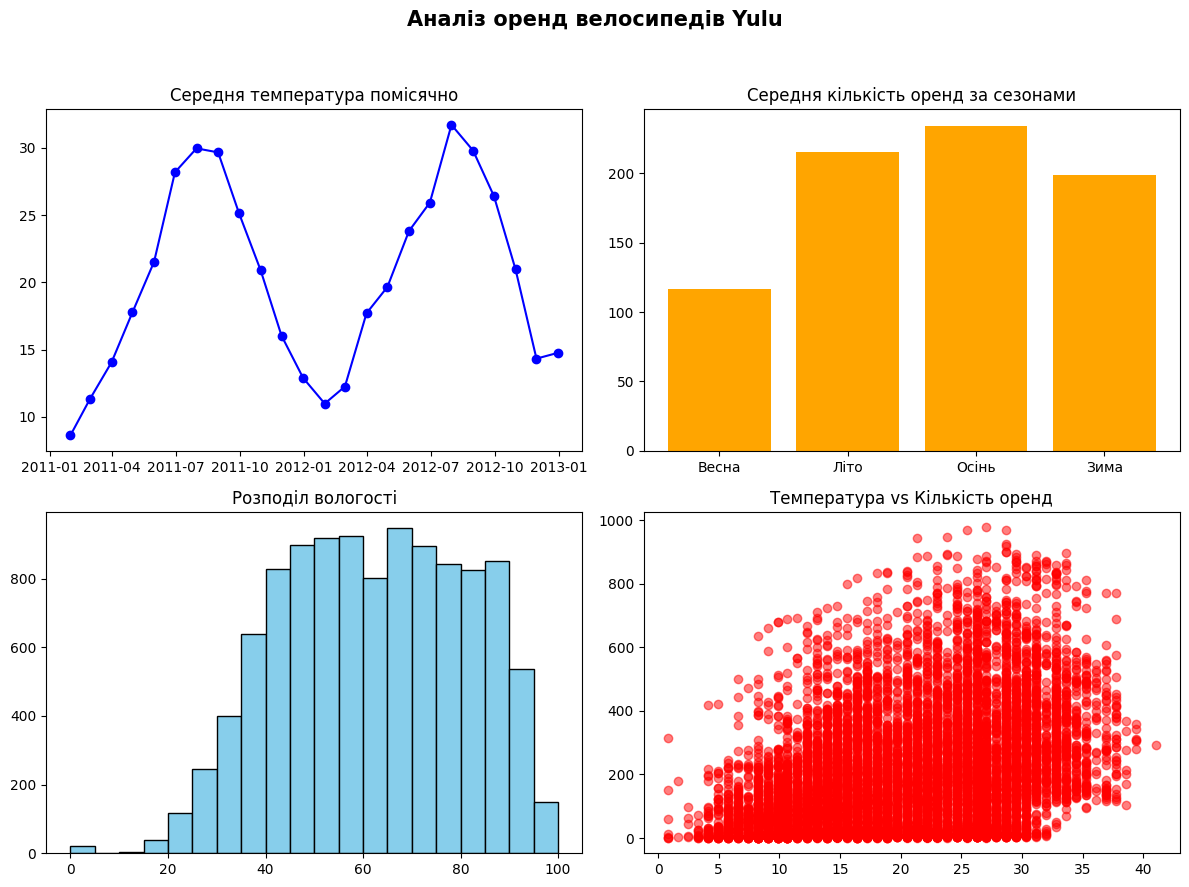

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle('Аналіз оренд велосипедів Yulu', fontsize=15, fontweight='bold')

# Лінійний графік середньої температури помісячно
ax[0, 0].plot(df['temp'].resample('M').mean(), marker='o', color='blue')
ax[0, 0].set_title('Середня температура помісячно')

# Стовпчикова діаграма середньої кількості оренд за сезонами
ax[0, 1].bar(['Весна', 'Літо', 'Осінь', 'Зима'], df.groupby('season')['count'].mean(), color='orange')
ax[0, 1].set_title('Середня кількість оренд за сезонами')

# Гістограма вологості
ax[1, 0].hist(df['humidity'], bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')

# Scatter plot: температура vs кількість оренд
ax[1, 1].scatter(df['temp'], df['count'], alpha=0.5, color='red')
ax[1, 1].set_title('Температура vs Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.subplot() - малює кожен графік окремо, активуючи поточну область.
plt.subplots() - створює всі області одразу й дозволяє керувати ними через змінну ax.
Це зручніше, коли потрібно узгоджено змінювати вигляд кількох графіків або будувати великі дашборди.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

/tmp/ipython-input-2743070979.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['count'].resample('M').agg(['mean', 'min', 'max'])


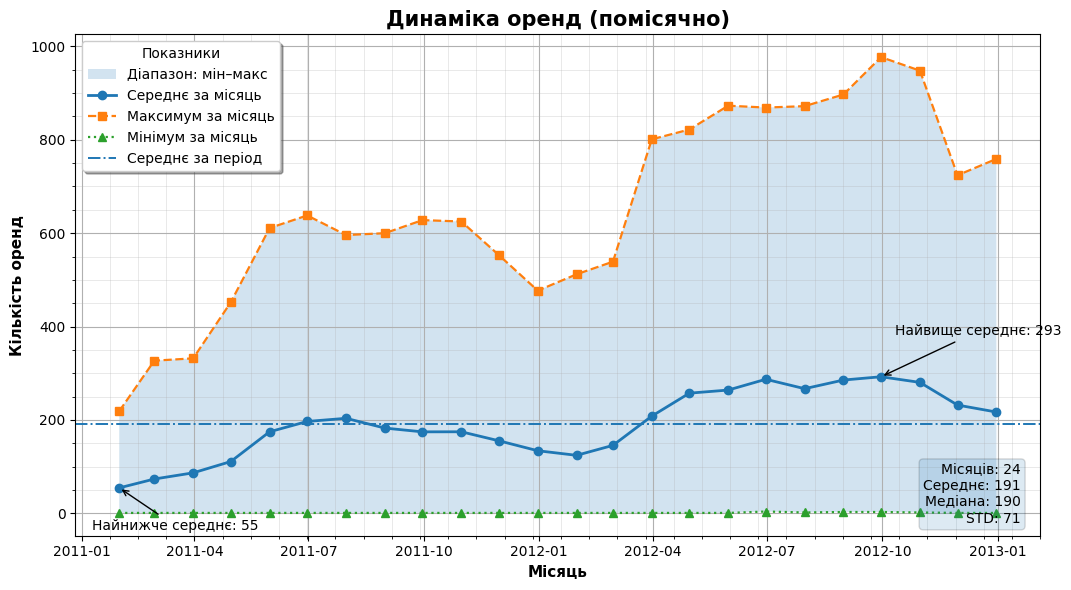

In [53]:
monthly = df['count'].resample('M').agg(['mean', 'min', 'max'])
x = monthly.index
y_mean, y_min, y_max = monthly['mean'], monthly['min'], monthly['max']
overall_mean = y_mean.mean()
i_max, i_min = y_mean.idxmax(), y_mean.idxmin()

plt.figure(figsize=(11, 6))

plt.fill_between(x, y_min, y_max, alpha=0.2, label='Діапазон: мін–макс')

plt.plot(x, y_mean, '-',  marker='o', linewidth=2,  label='Середнє за місяць')
plt.plot(x, y_max,  '--', marker='s', linewidth=1.6, label='Максимум за місяць')
plt.plot(x, y_min,  ':',  marker='^', linewidth=1.6, label='Мінімум за місяць')

plt.axhline(overall_mean, linestyle='-.', linewidth=1.4, label='Середнє за період')

plt.annotate(f'Найвище середнє: {y_mean.loc[i_max]:.0f}',
             xy=(i_max, y_mean.loc[i_max]), xytext=(10, 30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Найнижче середнє: {y_mean.loc[i_min]:.0f}',
             xy=(i_min, y_mean.loc[i_min]), xytext=(100, -30),
             textcoords='offset points', arrowprops=dict(arrowstyle='->'), ha='right')

plt.title('Динаміка оренд (помісячно)', fontsize=15, fontweight='bold')
plt.xlabel('Місяць', fontsize=11, fontweight='bold')
plt.ylabel('Кількість оренд', fontsize=11, fontweight='bold')

plt.grid(True, which='major', linewidth=0.8)
plt.minorticks_on()
plt.grid(True, which='minor', linewidth=0.5, alpha=0.4)

plt.legend(title='Показники', shadow=True)

stats = f"Місяців: {len(monthly)}\nСереднє: {y_mean.mean():.0f}\nМедіана: {y_mean.median():.0f}\nSTD: {y_mean.std():.0f}"
plt.gca().text(0.98, 0.02, stats, transform=plt.gca().transAxes,
               ha='right', va='bottom', bbox=dict(boxstyle='round', alpha=0.15))

plt.tight_layout()
plt.show()